In [12]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time
import sys
import torch

import pickle
sys.path.insert(0, './../../modules/')

from basic.modules.Utils import running_mean as rm
from basic.modules.Utils import one_hot_state, onehot_state_collection, twoD_states

# import representation type
from basic.modules.Agents.RepresentationLearning import PlaceCells
# import actor critic network
from basic.modules.Agents.Networks import ActorCritic as Network
# import agent class wrapper to handle behaviour
from basic.modules.Agents import Agent
# import experiment class to handle run and logging
from basic.modules.Experiments import expt


# get environment
import gym

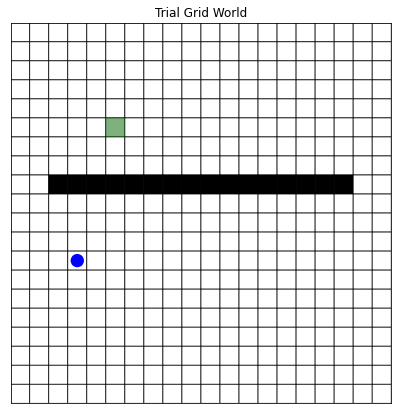

In [31]:
# make env
env_name = 'gym_grid:gridworld-v4'
env = gym.make(env_name)
plt.show()

In [32]:
oh_state_reps = {}
    
place_cells = PlaceCells(env.shape, env.nstates, field_size=0.1)
pc_state_reps = {}

for state in env.useable:
    oh_state_reps[env.twoD2oneD(state)] = one_hot_state(env,env.twoD2oneD(state))
    pc_state_reps[env.twoD2oneD(state)] = place_cells.get_activities([state])[0]

input_dims = len(oh_state_reps[list(oh_state_reps.keys())[0]])

In [ ]:
## onehot state representations
for _ in range(5):
    oh_network = Network(input_dims=[input_dims],fc1_dims=200,fc2_dims=200,output_dims=env.action_space.n, lr=0.0005)
    oh_agent = Agent(oh_network, state_representations=oh_state_reps)

    ex = expt(oh_agent,env)

    num_trials = 5000
    num_events = 250
    ex.run(num_trials, num_events)

    expt_type = 'onehot_train'
    directory = '../../Data/'
    filename  = 'mf_training.csv'

    ex.record_log(expt_type, env_name, num_trials, num_events, dir=directory, file=filename)

In [33]:
## place cell representations
for _ in range(5):
    pc_network = Network(input_dims=[input_dims],fc1_dims=200,fc2_dims=200,output_dims=env.action_space.n, lr=0.0005)
    pc_agent = Agent(pc_network, state_representations=pc_state_reps)

    ex = expt(pc_agent,env)

    num_trials = 5000
    num_events = 250
    ex.run(num_trials, num_events)

    expt_type = 'place_cell_train'
    directory = '../../Data/'
    filename  = 'mf_training.csv'
    
    ex.data['place_cells'] = place_cells
    
    extras = [place_cells.field_size]

    ex.record_log(expt_type, env_name, num_trials, num_events, dir=directory, file=filename, extra=extras)

Episode: 0, Score: 8.29 (Running Avg:8.29) [0.1565868854522705s]
Episode: 100, Score: 9.64 (Running Avg:9.632222222222222) [5.664740562438965s]
Episode: 200, Score: 9.88 (Running Avg:9.793333333333331) [2.0320539474487305s]
Episode: 300, Score: 9.94 (Running Avg:9.743333333333332) [1.640859603881836s]
Episode: 400, Score: 9.78 (Running Avg:9.866666666666667) [1.5345649719238281s]
Episode: 500, Score: 9.7 (Running Avg:9.864444444444441) [1.4371507167816162s]
Episode: 600, Score: 9.81 (Running Avg:9.82) [1.4329872131347656s]
Episode: 700, Score: 9.88 (Running Avg:9.82888888888889) [1.5417652130126953s]
Episode: 800, Score: 9.89 (Running Avg:9.757777777777777) [1.5235390663146973s]
Episode: 900, Score: 9.93 (Running Avg:9.79888888888889) [1.3850207328796387s]
Episode: 1000, Score: 9.7 (Running Avg:9.888888888888888) [1.3415658473968506s]
Episode: 1100, Score: 9.93 (Running Avg:9.868888888888888) [1.2939903736114502s]
Episode: 1200, Score: 9.82 (Running Avg:9.854444444444443) [1.3297190666

Episode: 200, Score: 9.83 (Running Avg:9.774444444444445) [2.4205398559570312s]
Episode: 300, Score: 9.91 (Running Avg:9.847777777777779) [1.7307815551757812s]
Episode: 400, Score: 9.97 (Running Avg:9.732222222222221) [1.557981014251709s]
Episode: 500, Score: 9.89 (Running Avg:9.81777777777778) [1.5407660007476807s]
Episode: 600, Score: 9.68 (Running Avg:9.843333333333334) [1.3895199298858643s]
Episode: 700, Score: 9.629999999999999 (Running Avg:9.816666666666666) [1.4167289733886719s]
Episode: 800, Score: 9.86 (Running Avg:9.843333333333334) [1.3036892414093018s]
Episode: 900, Score: 9.94 (Running Avg:9.823333333333332) [1.447904348373413s]
Episode: 1000, Score: 9.92 (Running Avg:9.853333333333332) [1.4087262153625488s]
Episode: 1100, Score: 9.78 (Running Avg:9.872222222222224) [1.4404313564300537s]
Episode: 1200, Score: 9.96 (Running Avg:9.885555555555555) [1.704556941986084s]
Episode: 1300, Score: 9.85 (Running Avg:9.846666666666668) [1.5625128746032715s]
Episode: 1400, Score: 9.87 

Episode: 400, Score: 9.89 (Running Avg:9.781111111111112) [1.9408884048461914s]
Episode: 500, Score: 9.79 (Running Avg:9.844444444444445) [1.5905554294586182s]
Episode: 600, Score: 9.8 (Running Avg:9.777777777777779) [1.5822079181671143s]
Episode: 700, Score: 9.95 (Running Avg:9.836666666666666) [1.3426671028137207s]
Episode: 800, Score: 9.9 (Running Avg:9.835555555555555) [1.4630389213562012s]
Episode: 900, Score: 9.73 (Running Avg:9.857777777777777) [1.439847469329834s]
Episode: 1000, Score: 9.86 (Running Avg:9.795555555555557) [1.3782727718353271s]
Episode: 1100, Score: 9.88 (Running Avg:9.80777777777778) [1.3682913780212402s]
Episode: 1200, Score: 9.86 (Running Avg:9.850000000000001) [1.341064691543579s]
Episode: 1300, Score: 9.93 (Running Avg:9.813333333333334) [1.2806315422058105s]
Episode: 1400, Score: 9.87 (Running Avg:9.816666666666666) [1.4147577285766602s]
Episode: 1500, Score: 9.86 (Running Avg:9.834444444444443) [1.2828285694122314s]
Episode: 1600, Score: 9.94 (Running Avg

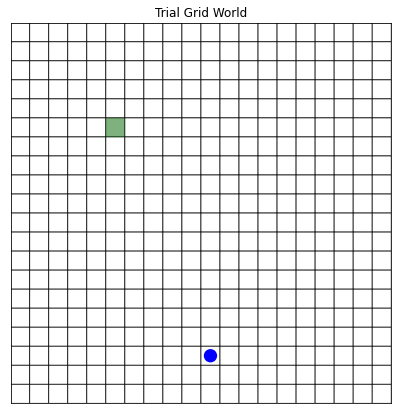

Episode: 0, Score: 8.339999999999998 (Running Avg:8.339999999999998) [0.16977715492248535s]
Episode: 100, Score: 9.77 (Running Avg:9.54888888888889) [7.315678358078003s]
Episode: 200, Score: 8.979999999999999 (Running Avg:9.624444444444443) [3.3668317794799805s]
Episode: 300, Score: 9.92 (Running Avg:9.844444444444445) [1.7756905555725098s]
Episode: 400, Score: 9.7 (Running Avg:9.822222222222223) [1.6078834533691406s]
Episode: 500, Score: 9.91 (Running Avg:9.82) [1.4526169300079346s]
Episode: 600, Score: 9.81 (Running Avg:9.825555555555557) [1.4615569114685059s]
Episode: 700, Score: 9.81 (Running Avg:9.882222222222223) [1.189894199371338s]
Episode: 800, Score: 9.87 (Running Avg:9.911111111111111) [1.1559624671936035s]
Episode: 900, Score: 9.86 (Running Avg:9.853333333333333) [1.0844624042510986s]
Episode: 1000, Score: 9.81 (Running Avg:9.854444444444445) [1.0692329406738281s]
Episode: 1100, Score: 9.81 (Running Avg:9.886666666666667) [1.1317849159240723s]
Episode: 1200, Score: 9.76 (Ru

Episode: 100, Score: 9.379999999999999 (Running Avg:9.386666666666667) [13.76911211013794s]
Episode: 200, Score: 9.81 (Running Avg:9.778888888888888) [4.465512275695801s]
Episode: 300, Score: 9.82 (Running Avg:9.841111111111111) [1.8807289600372314s]
Episode: 400, Score: 9.86 (Running Avg:9.805555555555555) [1.408294916152954s]
Episode: 500, Score: 9.82 (Running Avg:9.824444444444445) [1.1359221935272217s]
Episode: 600, Score: 9.83 (Running Avg:9.838888888888887) [1.2286810874938965s]
Episode: 700, Score: 9.92 (Running Avg:9.818888888888887) [1.2405509948730469s]
Episode: 800, Score: 9.9 (Running Avg:9.89) [1.1768760681152344s]
Episode: 900, Score: 9.89 (Running Avg:9.895555555555555) [1.1236977577209473s]
Episode: 1000, Score: 9.92 (Running Avg:9.862222222222222) [1.1705312728881836s]
Episode: 1100, Score: 9.9 (Running Avg:9.857777777777777) [1.1793849468231201s]
Episode: 1200, Score: 9.9 (Running Avg:9.857777777777777) [1.170316219329834s]
Episode: 1300, Score: 9.89 (Running Avg:9.86

Episode: 300, Score: 9.72 (Running Avg:9.843333333333334) [1.7952725887298584s]
Episode: 400, Score: 9.96 (Running Avg:9.852222222222222) [1.5051345825195312s]
Episode: 500, Score: 9.73 (Running Avg:9.837777777777777) [1.2795965671539307s]
Episode: 600, Score: 9.87 (Running Avg:9.881111111111109) [1.2443327903747559s]
Episode: 700, Score: 9.96 (Running Avg:9.875555555555557) [1.0624840259552002s]
Episode: 800, Score: 9.77 (Running Avg:9.84) [1.1236541271209717s]
Episode: 900, Score: 9.88 (Running Avg:9.871111111111112) [1.1564397811889648s]
Episode: 1000, Score: 9.91 (Running Avg:9.904444444444444) [1.121244192123413s]
Episode: 1100, Score: 9.87 (Running Avg:9.856666666666667) [1.093808650970459s]
Episode: 1200, Score: 9.95 (Running Avg:9.889999999999999) [1.1512296199798584s]
Episode: 1300, Score: 9.76 (Running Avg:9.879999999999999) [1.094803810119629s]
Episode: 1400, Score: 9.87 (Running Avg:9.86888888888889) [1.1248717308044434s]
Episode: 1500, Score: 9.96 (Running Avg:9.8544444444

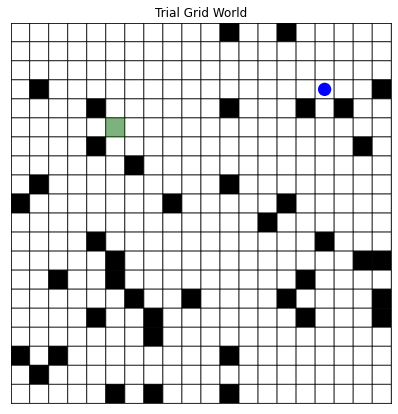

Episode: 0, Score: -2.4999999999999907 (Running Avg:-2.4999999999999907) [0.28240513801574707s]
Episode: 100, Score: 9.84 (Running Avg:7.764444444444446) [13.169978141784668s]
Episode: 200, Score: 9.9 (Running Avg:9.747777777777777) [4.4502480030059814s]
Episode: 300, Score: 9.95 (Running Avg:9.67111111111111) [2.3701467514038086s]
Episode: 400, Score: 9.67 (Running Avg:9.676666666666668) [2.509199857711792s]
Episode: 500, Score: 9.88 (Running Avg:9.806666666666665) [2.115530014038086s]
Episode: 600, Score: 9.8 (Running Avg:9.619999999999997) [1.8117060661315918s]
Episode: 700, Score: 9.73 (Running Avg:9.767777777777779) [2.0818560123443604s]
Episode: 800, Score: 9.65 (Running Avg:9.757777777777779) [1.9432470798492432s]
Episode: 900, Score: 9.7 (Running Avg:9.723333333333333) [1.9665820598602295s]
Episode: 1000, Score: 9.95 (Running Avg:9.82) [2.0097100734710693s]
Episode: 1100, Score: 8.469999999999999 (Running Avg:9.578888888888889) [2.345750570297241s]
Episode: 1200, Score: 9.46999

Episode: 100, Score: 9.78 (Running Avg:9.655555555555555) [9.474306106567383s]
Episode: 200, Score: 9.84 (Running Avg:9.512222222222224) [3.2465660572052s]
Episode: 300, Score: 9.81 (Running Avg:9.725555555555555) [2.3790297508239746s]
Episode: 400, Score: 9.92 (Running Avg:9.587777777777777) [2.3559625148773193s]
Episode: 500, Score: 9.87 (Running Avg:9.735555555555557) [2.096036911010742s]
Episode: 600, Score: 9.95 (Running Avg:9.683333333333332) [2.185936689376831s]
Episode: 700, Score: 9.94 (Running Avg:9.804444444444444) [2.053467035293579s]
Episode: 800, Score: 9.83 (Running Avg:9.617777777777778) [2.2811527252197266s]
Episode: 900, Score: 9.94 (Running Avg:9.802222222222222) [1.915163278579712s]
Episode: 1000, Score: 9.7 (Running Avg:9.838888888888889) [1.8708832263946533s]
Episode: 1100, Score: 9.86 (Running Avg:9.787777777777778) [1.7204713821411133s]
Episode: 1200, Score: 9.77 (Running Avg:9.855555555555554) [1.7362937927246094s]
Episode: 1300, Score: 9.92 (Running Avg:9.6733

Episode: 300, Score: 9.7 (Running Avg:9.724444444444444) [2.584775686264038s]
Episode: 400, Score: 9.45 (Running Avg:8.34666666666667) [2.994614601135254s]
Episode: 500, Score: 9.88 (Running Avg:9.674444444444445) [2.8721485137939453s]
Episode: 600, Score: 9.95 (Running Avg:9.773333333333333) [2.1318163871765137s]
Episode: 700, Score: 9.66 (Running Avg:9.859999999999998) [1.904855728149414s]
Episode: 800, Score: 9.94 (Running Avg:9.843333333333334) [2.0333683490753174s]
Episode: 900, Score: 9.8 (Running Avg:9.87111111111111) [1.8553860187530518s]
Episode: 1000, Score: 9.69 (Running Avg:9.889999999999999) [2.0151655673980713s]
Episode: 1100, Score: 9.75 (Running Avg:9.857777777777777) [1.728227138519287s]
Episode: 1200, Score: 9.91 (Running Avg:9.834444444444443) [2.3946690559387207s]
Episode: 1300, Score: 9.78 (Running Avg:9.794444444444444) [2.24589467048645s]
Episode: 1400, Score: 9.75 (Running Avg:9.78888888888889) [1.9068713188171387s]
Episode: 1500, Score: 9.9 (Running Avg:9.79444

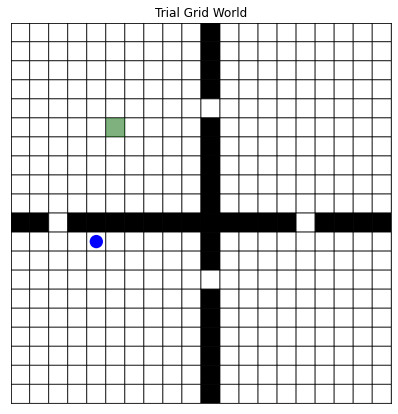

Episode: 0, Score: -2.4999999999999907 (Running Avg:-2.4999999999999907) [0.22414660453796387s]
Episode: 100, Score: 9.69 (Running Avg:7.863333333333334) [12.793572902679443s]
Episode: 200, Score: 9.9 (Running Avg:8.104444444444445) [7.223814249038696s]
Episode: 300, Score: 9.36 (Running Avg:9.452222222222222) [4.424650192260742s]
Episode: 400, Score: 9.95 (Running Avg:9.714444444444446) [3.8174774646759033s]
Episode: 500, Score: 9.53 (Running Avg:9.664444444444444) [3.504838466644287s]
Episode: 600, Score: 9.78 (Running Avg:9.648888888888887) [3.6841776371002197s]
Episode: 700, Score: 9.72 (Running Avg:9.613333333333333) [3.096191883087158s]
Episode: 800, Score: 9.68 (Running Avg:9.68) [2.5214452743530273s]
Episode: 900, Score: 9.94 (Running Avg:9.762222222222222) [2.2129483222961426s]
Episode: 1000, Score: 9.34 (Running Avg:9.658888888888889) [2.0815813541412354s]
Episode: 1100, Score: 9.81 (Running Avg:9.762222222222222) [1.9629592895507812s]
Episode: 1200, Score: 9.97 (Running Avg:

Episode: 100, Score: -2.4999999999999907 (Running Avg:3.873333333333338) [17.12538766860962s]
Episode: 200, Score: -2.4999999999999907 (Running Avg:9.366666666666667) [9.95205307006836s]
Episode: 300, Score: 9.56 (Running Avg:8.173333333333334) [5.537133693695068s]
Episode: 400, Score: 9.19 (Running Avg:9.596666666666668) [4.858144521713257s]
Episode: 500, Score: 9.67 (Running Avg:9.663333333333334) [3.915025234222412s]
Episode: 600, Score: 9.84 (Running Avg:9.655555555555557) [5.34485125541687s]
Episode: 700, Score: 9.78 (Running Avg:9.705555555555556) [3.783069610595703s]
Episode: 800, Score: 9.89 (Running Avg:9.59222222222222) [4.3715455532073975s]
Episode: 900, Score: 9.78 (Running Avg:9.492222222222221) [3.6465957164764404s]
Episode: 1000, Score: 9.83 (Running Avg:9.709999999999999) [2.4822750091552734s]
Episode: 1100, Score: 9.66 (Running Avg:9.866666666666667) [1.835160732269287s]
Episode: 1200, Score: 9.84 (Running Avg:9.79) [1.692448377609253s]
Episode: 1300, Score: 9.58 (Runn

Episode: 4800, Score: 9.95 (Running Avg:2.91555555555556) [10.067617177963257s]
Episode: 4900, Score: -2.4999999999999907 (Running Avg:1.5944444444444503) [9.99639630317688s]
Logged with ID 608a55d1-d8e2-40e8-b332-de8bd9467d21
Episode: 0, Score: -2.4999999999999907 (Running Avg:-2.4999999999999907) [0.20595026016235352s]
Episode: 100, Score: -2.4999999999999907 (Running Avg:3.8922222222222254) [14.678498983383179s]
Episode: 200, Score: 9.01 (Running Avg:6.5855555555555565) [8.969218969345093s]
Episode: 300, Score: 9.81 (Running Avg:9.681111111111111) [6.39918327331543s]
Episode: 400, Score: 9.58 (Running Avg:8.33222222222222) [5.181689977645874s]
Episode: 500, Score: 9.58 (Running Avg:9.623333333333333) [4.309658765792847s]
Episode: 600, Score: 9.35 (Running Avg:9.795555555555556) [4.216388940811157s]
Episode: 700, Score: 9.89 (Running Avg:9.59) [3.000886917114258s]
Episode: 800, Score: -2.4999999999999907 (Running Avg:8.205555555555556) [4.451058626174927s]
Episode: 900, Score: 9.45 (

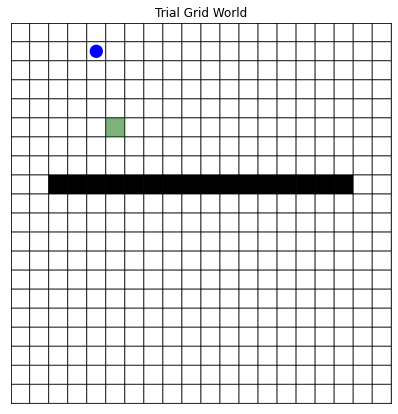

Episode: 0, Score: -2.4999999999999907 (Running Avg:-2.4999999999999907) [0.2161870002746582s]
Episode: 100, Score: 9.299999999999999 (Running Avg:5.432222222222225) [13.20061182975769s]
Episode: 200, Score: 9.059999999999999 (Running Avg:9.235555555555555) [8.158342599868774s]
Episode: 300, Score: 8.91 (Running Avg:9.631111111111112) [3.5402028560638428s]
Episode: 400, Score: 9.7 (Running Avg:9.68) [2.097032070159912s]
Episode: 500, Score: 9.57 (Running Avg:9.813333333333334) [1.9713337421417236s]
Episode: 600, Score: 9.72 (Running Avg:9.785555555555556) [1.7883269786834717s]
Episode: 700, Score: 9.79 (Running Avg:9.77111111111111) [1.9802005290985107s]
Episode: 800, Score: 9.87 (Running Avg:9.84) [1.6875712871551514s]
Episode: 900, Score: 9.74 (Running Avg:9.732222222222223) [1.7167730331420898s]
Episode: 1000, Score: 9.69 (Running Avg:9.80888888888889) [1.7697646617889404s]
Episode: 1100, Score: 9.93 (Running Avg:9.796666666666667) [1.7202985286712646s]
Episode: 1200, Score: 9.88 (R

Episode: 100, Score: 9.24 (Running Avg:6.561111111111114) [11.516541481018066s]
Episode: 200, Score: 9.52 (Running Avg:9.234444444444446) [7.045813322067261s]
Episode: 300, Score: 9.64 (Running Avg:9.717777777777778) [2.3291826248168945s]
Episode: 400, Score: 9.44 (Running Avg:9.756666666666666) [2.0237786769866943s]
Episode: 500, Score: 9.66 (Running Avg:9.816666666666666) [1.9419243335723877s]
Episode: 600, Score: 9.94 (Running Avg:9.762222222222222) [1.772430658340454s]
Episode: 700, Score: 9.79 (Running Avg:9.831111111111111) [1.6125051975250244s]
Episode: 800, Score: 9.64 (Running Avg:9.867777777777778) [1.7134215831756592s]
Episode: 900, Score: 9.66 (Running Avg:9.822222222222221) [1.7441983222961426s]
Episode: 1000, Score: 9.76 (Running Avg:9.796666666666667) [1.6763877868652344s]
Episode: 1100, Score: 9.73 (Running Avg:9.78) [1.5819106101989746s]
Episode: 1200, Score: 9.62 (Running Avg:9.851111111111111) [1.5123646259307861s]
Episode: 1300, Score: 9.54 (Running Avg:9.7377777777

Episode: 200, Score: 9.76 (Running Avg:9.476666666666667) [5.45104193687439s]
Episode: 300, Score: 9.78 (Running Avg:9.736666666666666) [2.470440149307251s]
Episode: 400, Score: 9.95 (Running Avg:9.755555555555556) [2.0906786918640137s]
Episode: 500, Score: 9.74 (Running Avg:9.773333333333333) [1.8074407577514648s]
Episode: 600, Score: 9.79 (Running Avg:9.767777777777777) [1.8183159828186035s]
Episode: 700, Score: 9.73 (Running Avg:9.784444444444444) [1.692671775817871s]
Episode: 800, Score: 9.77 (Running Avg:9.747777777777777) [1.7835049629211426s]
Episode: 900, Score: 9.74 (Running Avg:9.748888888888889) [1.6817209720611572s]
Episode: 1000, Score: 9.79 (Running Avg:9.815555555555555) [1.6976778507232666s]
Episode: 1100, Score: 9.69 (Running Avg:9.734444444444442) [1.6192431449890137s]
Episode: 1200, Score: 9.69 (Running Avg:9.802222222222222) [1.3817014694213867s]
Episode: 1300, Score: 9.78 (Running Avg:9.826666666666666) [1.578125238418579s]
Episode: 1400, Score: 9.79 (Running Avg:9

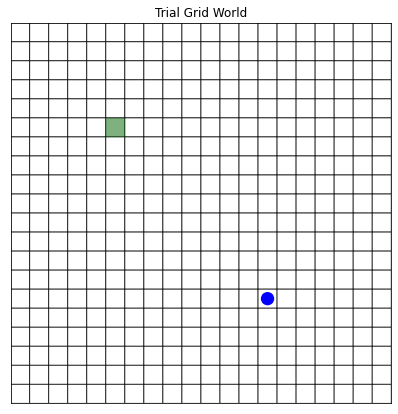

Episode: 0, Score: -2.4999999999999907 (Running Avg:-2.4999999999999907) [0.2304549217224121s]
Episode: 100, Score: 9.0 (Running Avg:9.209999999999999) [9.957470893859863s]
Episode: 200, Score: 9.85 (Running Avg:9.481111111111112) [4.811664819717407s]
Episode: 300, Score: 9.88 (Running Avg:9.759999999999998) [3.4356091022491455s]
Episode: 400, Score: 9.89 (Running Avg:9.784444444444444) [1.9430913925170898s]
Episode: 500, Score: 9.9 (Running Avg:9.856666666666664) [1.6923515796661377s]
Episode: 600, Score: 9.85 (Running Avg:9.848888888888888) [1.2763772010803223s]
Episode: 700, Score: 9.86 (Running Avg:9.855555555555556) [1.406965970993042s]
Episode: 800, Score: 9.99 (Running Avg:9.834444444444443) [1.3475570678710938s]
Episode: 900, Score: 9.91 (Running Avg:9.86111111111111) [1.3117365837097168s]
Episode: 1000, Score: 9.97 (Running Avg:9.842222222222224) [1.251983880996704s]
Episode: 1100, Score: 9.75 (Running Avg:9.818888888888889) [1.1706483364105225s]
Episode: 1200, Score: 9.92 (Ru

Episode: 200, Score: -2.4999999999999907 (Running Avg:-1.161111111111103) [9.065910816192627s]
Episode: 300, Score: 9.75 (Running Avg:9.56111111111111) [8.42043924331665s]
Episode: 400, Score: 9.95 (Running Avg:9.586666666666666) [3.745384931564331s]
Episode: 500, Score: 9.78 (Running Avg:9.697777777777778) [2.5422489643096924s]
Episode: 600, Score: 9.81 (Running Avg:9.624444444444444) [2.189554214477539s]
Episode: 700, Score: 9.93 (Running Avg:9.81111111111111) [1.77473783493042s]
Episode: 800, Score: 9.87 (Running Avg:9.775555555555556) [2.0315916538238525s]
Episode: 900, Score: 9.95 (Running Avg:9.797777777777778) [1.5466444492340088s]
Episode: 1000, Score: 9.9 (Running Avg:9.79888888888889) [1.5890965461730957s]
Episode: 1100, Score: 9.79 (Running Avg:9.831111111111111) [1.4342825412750244s]
Episode: 1200, Score: 9.9 (Running Avg:9.851111111111113) [1.312281847000122s]
Episode: 1300, Score: 9.8 (Running Avg:9.83222222222222) [1.4227492809295654s]
Episode: 1400, Score: 9.73 (Running

Episode: 400, Score: 9.65 (Running Avg:9.736666666666666) [2.8475589752197266s]
Episode: 500, Score: 9.89 (Running Avg:9.593333333333334) [2.120358467102051s]
Episode: 600, Score: 9.79 (Running Avg:9.835555555555555) [1.7167158126831055s]
Episode: 700, Score: 9.87 (Running Avg:9.82) [1.5074257850646973s]
Episode: 800, Score: 9.709999999999999 (Running Avg:9.86111111111111) [1.4554250240325928s]
Episode: 900, Score: 9.94 (Running Avg:9.847777777777777) [1.317748785018921s]
Episode: 1000, Score: 9.91 (Running Avg:9.841111111111111) [1.3336925506591797s]
Episode: 1100, Score: 9.84 (Running Avg:9.845555555555556) [1.2677733898162842s]
Episode: 1200, Score: 9.94 (Running Avg:9.901111111111113) [1.2044048309326172s]
Episode: 1300, Score: 9.89 (Running Avg:9.823333333333332) [1.181917428970337s]
Episode: 1400, Score: 9.82 (Running Avg:9.85111111111111) [1.2632904052734375s]
Episode: 1500, Score: 9.93 (Running Avg:9.851111111111111) [1.1822361946105957s]
Episode: 1600, Score: 9.81 (Running Avg

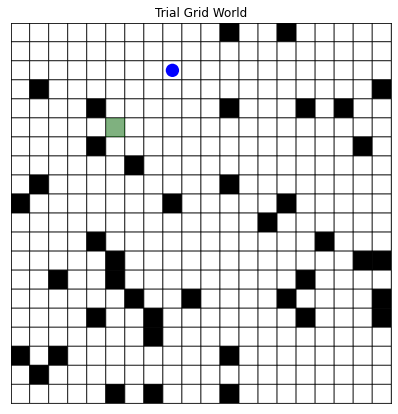

Episode: 0, Score: -2.4999999999999907 (Running Avg:-2.4999999999999907) [0.22675776481628418s]
Episode: 100, Score: -2.4999999999999907 (Running Avg:2.305555555555561) [16.2242648601532s]
Episode: 200, Score: 9.17 (Running Avg:6.541111111111113) [9.915535688400269s]
Episode: 300, Score: 9.58 (Running Avg:8.953333333333333) [6.096938848495483s]
Episode: 400, Score: 9.87 (Running Avg:9.749999999999998) [4.244419574737549s]
Episode: 500, Score: 9.709999999999999 (Running Avg:9.647777777777778) [4.4172656536102295s]
Episode: 600, Score: 9.82 (Running Avg:9.678888888888888) [3.2213282585144043s]
Episode: 700, Score: 9.78 (Running Avg:9.806666666666665) [2.374823808670044s]
Episode: 800, Score: 9.75 (Running Avg:9.728888888888887) [1.9239435195922852s]
Episode: 900, Score: 9.7 (Running Avg:9.63111111111111) [2.6972053050994873s]
Episode: 1000, Score: 9.65 (Running Avg:9.604444444444445) [2.4572291374206543s]
Episode: 1100, Score: 9.85 (Running Avg:9.803333333333335) [2.3512704372406006s]
Ep

Episode: 4900, Score: 7.949999999999999 (Running Avg:9.82777777777778) [1.9687206745147705s]
Logged with ID 6aaff138-ca20-417b-8c60-f074f598e30d
Episode: 0, Score: -2.4999999999999907 (Running Avg:-2.4999999999999907) [0.20615386962890625s]
Episode: 100, Score: 9.34 (Running Avg:1.2633333333333392) [14.430161476135254s]
Episode: 200, Score: 9.43 (Running Avg:9.291111111111112) [9.25845456123352s]
Episode: 300, Score: 9.28 (Running Avg:9.533333333333333) [5.377292156219482s]
Episode: 400, Score: 9.93 (Running Avg:8.27888888888889) [3.561694622039795s]
Episode: 500, Score: 9.76 (Running Avg:8.306666666666667) [3.0018112659454346s]
Episode: 600, Score: 8.69 (Running Avg:9.594444444444443) [3.2452664375305176s]
Episode: 700, Score: 9.91 (Running Avg:9.631111111111112) [2.878206491470337s]
Episode: 800, Score: 9.61 (Running Avg:9.734444444444444) [2.4412152767181396s]
Episode: 900, Score: 9.36 (Running Avg:9.671111111111111) [2.601064682006836s]
Episode: 1000, Score: 9.73 (Running Avg:9.582

Episode: 4900, Score: 9.77 (Running Avg:9.78111111111111) [1.6561501026153564s]
Logged with ID b44b6d3a-defb-41d4-896f-0937cf0cf164
Episode: 0, Score: -2.4999999999999907 (Running Avg:-2.4999999999999907) [0.2225651741027832s]
Episode: 100, Score: -2.4999999999999907 (Running Avg:6.243333333333335) [16.198458433151245s]
Episode: 200, Score: 9.53 (Running Avg:8.080000000000002) [8.430902004241943s]
Episode: 300, Score: 9.77 (Running Avg:9.515555555555556) [5.39992880821228s]
Episode: 400, Score: 9.62 (Running Avg:7.012222222222224) [4.8667683601379395s]
Episode: 500, Score: 9.459999999999999 (Running Avg:9.807777777777778) [3.4159717559814453s]
Episode: 600, Score: 9.92 (Running Avg:8.462222222222222) [2.766502857208252s]
Episode: 700, Score: 9.74 (Running Avg:9.735555555555557) [3.041689872741699s]
Episode: 800, Score: 9.5 (Running Avg:8.447777777777778) [2.6487488746643066s]
Episode: 900, Score: -2.4999999999999907 (Running Avg:1.5044444444444505) [11.811515808105469s]
Episode: 1000, 

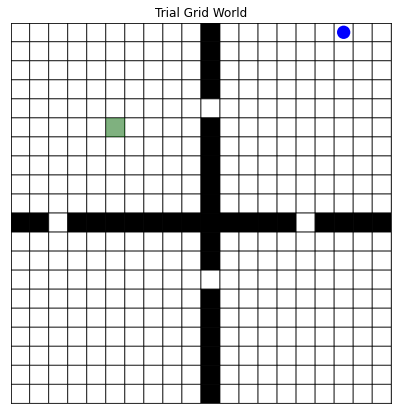

Episode: 0, Score: -2.4999999999999907 (Running Avg:-2.4999999999999907) [0.2130906581878662s]
Episode: 100, Score: -2.4999999999999907 (Running Avg:-1.318888888888881) [17.70028781890869s]
Episode: 200, Score: -2.4999999999999907 (Running Avg:5.257777777777782) [14.03459906578064s]
Episode: 300, Score: 9.75 (Running Avg:7.783333333333335) [9.043314456939697s]
Episode: 400, Score: 9.61 (Running Avg:6.882222222222224) [6.885120391845703s]
Episode: 500, Score: 9.91 (Running Avg:9.493333333333332) [5.534979581832886s]
Episode: 600, Score: 9.65 (Running Avg:7.967777777777779) [5.729467153549194s]
Episode: 700, Score: 9.92 (Running Avg:6.973333333333335) [6.398200035095215s]
Episode: 800, Score: 9.54 (Running Avg:8.093333333333335) [6.549468278884888s]
Episode: 900, Score: 9.5 (Running Avg:8.157777777777778) [5.68731427192688s]
Episode: 1000, Score: 9.8 (Running Avg:8.208888888888888) [4.903253793716431s]
Episode: 1100, Score: 9.64 (Running Avg:7.926666666666667) [4.512601137161255s]
Episod

Episode: 4800, Score: 9.77 (Running Avg:9.835555555555555) [1.4977123737335205s]
Episode: 4900, Score: 9.75 (Running Avg:9.767777777777777) [1.9919624328613281s]
Logged with ID 8bbdb282-e2be-46ae-835a-80f595016b07
Episode: 0, Score: -2.4999999999999907 (Running Avg:-2.4999999999999907) [0.21423959732055664s]
Episode: 100, Score: 8.469999999999999 (Running Avg:2.461111111111117) [16.74390411376953s]
Episode: 200, Score: 8.179999999999998 (Running Avg:5.131111111111114) [14.709086418151855s]
Episode: 300, Score: 9.45 (Running Avg:9.126666666666667) [8.892052412033081s]
Episode: 400, Score: 7.9399999999999995 (Running Avg:6.282222222222225) [8.067363977432251s]
Episode: 500, Score: 9.17 (Running Avg:9.142222222222223) [7.667310476303101s]
Episode: 600, Score: 7.9399999999999995 (Running Avg:8.122222222222222) [5.459814071655273s]
Episode: 700, Score: -2.4999999999999907 (Running Avg:9.325555555555553) [6.198241949081421s]
Episode: 800, Score: 9.62 (Running Avg:8.005555555555556) [5.573464

Episode: 4600, Score: 9.83 (Running Avg:9.644444444444442) [2.007793426513672s]
Episode: 4700, Score: 8.77 (Running Avg:9.877777777777776) [1.6583192348480225s]
Episode: 4800, Score: 9.74 (Running Avg:9.815555555555555) [1.5626466274261475s]
Episode: 4900, Score: 9.629999999999999 (Running Avg:9.792222222222222) [1.712383508682251s]
Logged with ID a664a581-2318-4195-a7b4-8b1d1d88b6cc
Episode: 0, Score: -2.4999999999999907 (Running Avg:-2.4999999999999907) [0.2351856231689453s]
Episode: 100, Score: 7.830000000000002 (Running Avg:0.17444444444445167) [16.678941011428833s]
Episode: 200, Score: 8.169999999999998 (Running Avg:1.292222222222228) [13.702107429504395s]
Episode: 300, Score: 7.6600000000000055 (Running Avg:5.052222222222225) [12.831380128860474s]
Episode: 400, Score: 9.459999999999999 (Running Avg:5.473333333333337) [8.721686840057373s]
Episode: 500, Score: 9.96 (Running Avg:6.903333333333335) [7.0048723220825195s]
Episode: 600, Score: 9.209999999999999 (Running Avg:9.6244444444

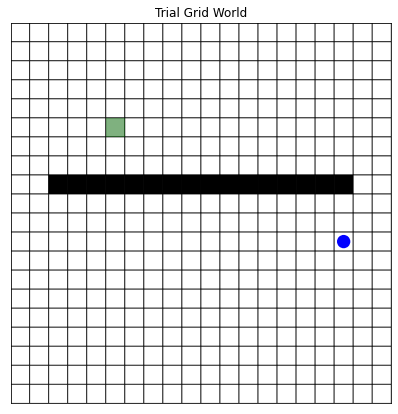

Episode: 0, Score: -2.4999999999999907 (Running Avg:-2.4999999999999907) [0.22102713584899902s]
Episode: 100, Score: -2.4999999999999907 (Running Avg:-0.14777777777777082) [17.195850610733032s]
Episode: 200, Score: 9.86 (Running Avg:5.314444444444447) [11.973083734512329s]
Episode: 300, Score: 7.640000000000006 (Running Avg:7.67888888888889) [8.092855215072632s]
Episode: 400, Score: 9.7 (Running Avg:9.344444444444443) [4.6026716232299805s]
Episode: 500, Score: 9.68 (Running Avg:9.632222222222222) [3.1058382987976074s]
Episode: 600, Score: 9.56 (Running Avg:9.703333333333335) [2.439422369003296s]
Episode: 700, Score: 9.88 (Running Avg:9.715555555555554) [2.236564874649048s]
Episode: 800, Score: 9.8 (Running Avg:9.780000000000001) [2.1543357372283936s]
Episode: 900, Score: 9.54 (Running Avg:9.706666666666665) [2.1366961002349854s]
Episode: 1000, Score: 9.219999999999999 (Running Avg:9.762222222222222) [2.170708417892456s]
Episode: 1100, Score: 9.84 (Running Avg:9.743333333333332) [1.8398

Episode: 100, Score: -2.4999999999999907 (Running Avg:-1.2244444444444362) [16.215086936950684s]
Episode: 200, Score: -2.4999999999999907 (Running Avg:2.7544444444444496) [13.073891401290894s]
Episode: 300, Score: 9.56 (Running Avg:9.427777777777777) [9.989494323730469s]
Episode: 400, Score: 9.16 (Running Avg:9.543333333333331) [4.873470067977905s]
Episode: 500, Score: 9.74 (Running Avg:9.624444444444444) [3.157888889312744s]
Episode: 600, Score: 9.81 (Running Avg:9.674444444444443) [2.6349754333496094s]
Episode: 700, Score: 9.81 (Running Avg:9.672222222222222) [2.5073020458221436s]
Episode: 800, Score: 9.73 (Running Avg:9.765555555555558) [1.9372849464416504s]
Episode: 900, Score: 9.69 (Running Avg:9.757777777777779) [2.030513048171997s]
Episode: 1000, Score: 9.86 (Running Avg:9.684444444444445) [1.8193678855895996s]
Episode: 1100, Score: 9.74 (Running Avg:9.768888888888888) [1.7595460414886475s]
Episode: 1200, Score: 9.82 (Running Avg:9.777777777777779) [1.8391106128692627s]
Episode:

Episode: 100, Score: -2.4999999999999907 (Running Avg:2.326666666666673) [15.66144871711731s]
Episode: 200, Score: 7.9 (Running Avg:4.124444444444449) [11.951826095581055s]
Episode: 300, Score: 8.93 (Running Avg:9.18222222222222) [7.629324913024902s]
Episode: 400, Score: 9.16 (Running Avg:9.306666666666665) [6.083316802978516s]
Episode: 500, Score: 9.11 (Running Avg:9.722222222222221) [3.9277420043945312s]
Episode: 600, Score: 9.73 (Running Avg:9.723333333333334) [2.732931137084961s]
Episode: 700, Score: 9.59 (Running Avg:9.803333333333335) [2.283869981765747s]
Episode: 800, Score: 9.7 (Running Avg:9.777777777777779) [2.0490927696228027s]
Episode: 900, Score: 9.87 (Running Avg:9.71888888888889) [2.3657331466674805s]
Episode: 1000, Score: 9.88 (Running Avg:9.71) [2.2939395904541016s]
Episode: 1100, Score: 9.96 (Running Avg:9.83) [1.7888743877410889s]
Episode: 1200, Score: 9.61 (Running Avg:9.765555555555556) [1.8820078372955322s]
Episode: 1300, Score: 9.67 (Running Avg:9.764444444444443

In [35]:
## place cell representations
for f in [0.2, 0.3]:
    for e in range(4):
        env_name = f'gym_grid:gridworld-v{e+1}'
        env = gym.make(env_name)
        place_cells = PlaceCells(env.shape, env.nstates, field_size=f)
        pc_state_reps = {}

        for state in env.useable:
            pc_state_reps[env.twoD2oneD(state)] = place_cells.get_activities([state])[0]

        for _ in range(5):
            pc_network = Network(input_dims=[input_dims],fc1_dims=200,fc2_dims=200,output_dims=env.action_space.n, lr=0.0005)
            pc_agent = Agent(pc_network, state_representations=pc_state_reps)

            ex = expt(pc_agent,env)

            num_trials = 5000
            num_events = 250
            ex.run(num_trials, num_events)

            expt_type = 'place_cell_train'
            directory = '../../Data/'
            filename  = 'mf_training.csv'

            ex.data['place_cells'] = place_cells

            extras = [place_cells.field_size]

            ex.record_log(expt_type, env_name, num_trials, num_events, dir=directory, file=filename, extra=extras)

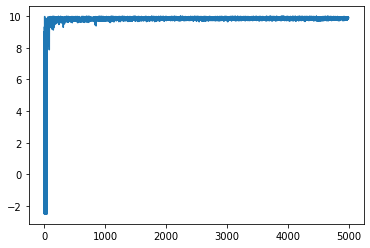

In [34]:
plt.plot(ex.data['total_reward'])
